# Car Price Prediction Project

In [1]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

# Loading data

In [4]:
df=pd.read_excel("/content/grive/MyDrive/car_price_data.xlsx")
df

,Unnamed: 0,Unnamed: 0.1,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,0,0,2016 Maruti Eeco,5 Seater AC BSIV,Manual,--,"45,347 kms",Petrol,--,Ahmedabad,3.5 Lakh
1,1,1,2018 Volkswagen Vento,1.5 TDI Highline,Manual,--,"97,922 kms",Diesel,--,Ahmedabad,6.99 Lakh
2,2,2,2017 Honda Amaze,S Option i-VTEC,Manual,--,"59,642 kms",Petrol,--,Ahmedabad,5.53 Lakh
3,3,3,2018 Honda City,i-VTEC V,Manual,--,"89,144 kms",Petrol,--,Ahmedabad,7.64 Lakh
4,4,4,2014 Maruti Wagon R,VXI,Manual,--,"1,31,125 kms",Petrol,--,Ahmedabad,2.94 Lakh
...,...,...,...,...,...,...,...,...,...,...,...
5488,5488,1140,2013 Skoda Octavia,Ambition 1.8 TSI AT,Automatic,First Owner,"50,000 kms",Petrol,2013,NaN,6.5 Lakh
5489,5489,1141,2015 Skoda Superb,Elegance 2.0 TDI CR AT,Automatic,Second Owner,"60,200 kms",Diesel,2015,NaN,13.5 Lakh
5490,5490,1142,2009 Toyota Innova,2.5 V Diesel 8-seater,Manual,First Owner,"1,74,855 kms",Diesel,2009,NaN,4.85 Lakh
5491,5491,1143,2011 Maruti Alto,LXi,Manual,Second Owner,"2,25,000 kms",Petrol,2011,NaN,1.5 Lakh


In [5]:
df.shape

(5493, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5493 entries, 0 to 5492
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5493 non-null   int64 
 1   Unnamed: 0.1      5493 non-null   int64 
 2   Brand             5493 non-null   object
 3   Varient           5493 non-null   object
 4   Transmission      5493 non-null   object
 5   Owner             5493 non-null   object
 6   KiloMeter         5493 non-null   object
 7   Fuel              5493 non-null   object
 8   Year_of_purchase  5493 non-null   object
 9   Location          4148 non-null   object
 10  Price             5493 non-null   object
dtypes: int64(2), object(9)
memory usage: 472.2+ KB


In [7]:
df.isnull().sum()

Unnamed: 0             0
Unnamed: 0.1           0
Brand                  0
Varient                0
Transmission           0
Owner                  0
KiloMeter              0
Fuel                   0
Year_of_purchase       0
Location            1345
Price                  0
dtype: int64

In [8]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head(5)

,Unnamed: 0.1,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,0,2016 Maruti Eeco,5 Seater AC BSIV,Manual,--,"45,347 kms",Petrol,--,Ahmedabad,3.5 Lakh
1,1,2018 Volkswagen Vento,1.5 TDI Highline,Manual,--,"97,922 kms",Diesel,--,Ahmedabad,6.99 Lakh
2,2,2017 Honda Amaze,S Option i-VTEC,Manual,--,"59,642 kms",Petrol,--,Ahmedabad,5.53 Lakh
3,3,2018 Honda City,i-VTEC V,Manual,--,"89,144 kms",Petrol,--,Ahmedabad,7.64 Lakh
4,4,2014 Maruti Wagon R,VXI,Manual,--,"1,31,125 kms",Petrol,--,Ahmedabad,2.94 Lakh


In [9]:
df.drop(['Unnamed: 0.1'],axis = 1,inplace = True)
df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,2016 Maruti Eeco,5 Seater AC BSIV,Manual,--,"45,347 kms",Petrol,--,Ahmedabad,3.5 Lakh
1,2018 Volkswagen Vento,1.5 TDI Highline,Manual,--,"97,922 kms",Diesel,--,Ahmedabad,6.99 Lakh
2,2017 Honda Amaze,S Option i-VTEC,Manual,--,"59,642 kms",Petrol,--,Ahmedabad,5.53 Lakh
3,2018 Honda City,i-VTEC V,Manual,--,"89,144 kms",Petrol,--,Ahmedabad,7.64 Lakh
4,2014 Maruti Wagon R,VXI,Manual,--,"1,31,125 kms",Petrol,--,Ahmedabad,2.94 Lakh


In [10]:
df.nunique()

Brand               1004
Varient             1353
Transmission           2
Owner                  6
KiloMeter           2490
Fuel                   5
Year_of_purchase      24
Location               8
Price                871
dtype: int64

In [11]:
df['Year_of_purchase'].value_counts()

--      1474
2016     405
2018     403
2017     396
2012     387
2015     386
2014     376
2013     371
2011     330
2010     241
2019     201
2009     139
2020     139
2008      98
2007      50
2021      38
2006      20
2005      14
2003       9
2004       6
2002       4
2000       3
2001       2
1986       1
Name: Year_of_purchase, dtype: int64

In [12]:
df['Owner'].value_counts()

First Owner             2870
--                      1474
Second Owner             992
Third Owner              129
Fourth & Above Owner      19
Test Drive Car             9
Name: Owner, dtype: int64

In [13]:
df['Fuel'].value_counts()

Petrol      3142
Diesel      2292
CNG           46
LPG           10
Electric       3
Name: Fuel, dtype: int64

In [14]:
df['Price'].value_counts()

4.5 Lakh      82
4 Lakh        78
4.25 Lakh     68
5.75 Lakh     68
5 Lakh        68
              ..
11.55 Lakh     1
63.95 Lakh     1
85,999         1
12.24 Lakh     1
20.7 Lakh      1
Name: Price, Length: 871, dtype: int64

In [15]:
df['Brand'].value_counts()

2015 Hyundai i20              53
2013 Hyundai i10              47
2015 Hyundai Grand i10        43
2011 Hyundai i10              42
2013 Hyundai i20              41
                              ..
2020 Volkswagen Vento          1
2011 Hyundai Santro Xing       1
2009 Mercedes-Benz E-Class     1
2004 Toyota Qualis             1
2011 Mahindra Xylo             1
Name: Brand, Length: 1004, dtype: int64

## Find missing values in data set

In [16]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Brand                0.000000
Varient              0.000000
Transmission         0.000000
Owner                0.000000
KiloMeter            0.000000
Fuel                 0.000000
Year_of_purchase     0.000000
Location            24.485709
Price                0.000000
dtype: float64

As we can see there is 24.48 percent missing values in Location columns

In [17]:
# identify variables with '--' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "--")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                     0
Brand                0
Varient              0
Transmission         0
Owner             1474
KiloMeter            0
Fuel                 0
Year_of_purchase  1474
Location             0
Price                0


In [18]:
df.Owner.value_counts()

First Owner             2870
--                      1474
Second Owner             992
Third Owner              129
Fourth & Above Owner      19
Test Drive Car             9
Name: Owner, dtype: int64

In [19]:
df.Year_of_purchase.value_counts()

--      1474
2016     405
2018     403
2017     396
2012     387
2015     386
2014     376
2013     371
2011     330
2010     241
2019     201
2009     139
2020     139
2008      98
2007      50
2021      38
2006      20
2005      14
2003       9
2004       6
2002       4
2000       3
2001       2
1986       1
Name: Year_of_purchase, dtype: int64

### **Data** **Visualization**

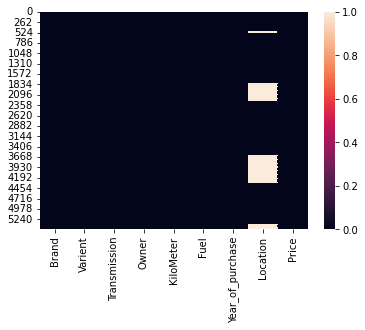

In [20]:
sns.heatmap(df.isnull())

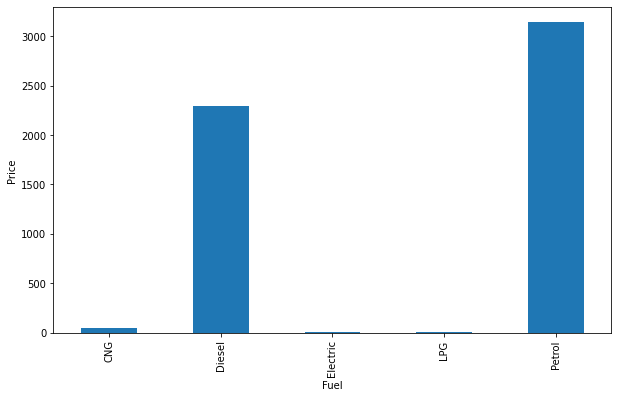

In [21]:
fig=plt.figure(figsize=(10,6))
ax = df.groupby('Fuel').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

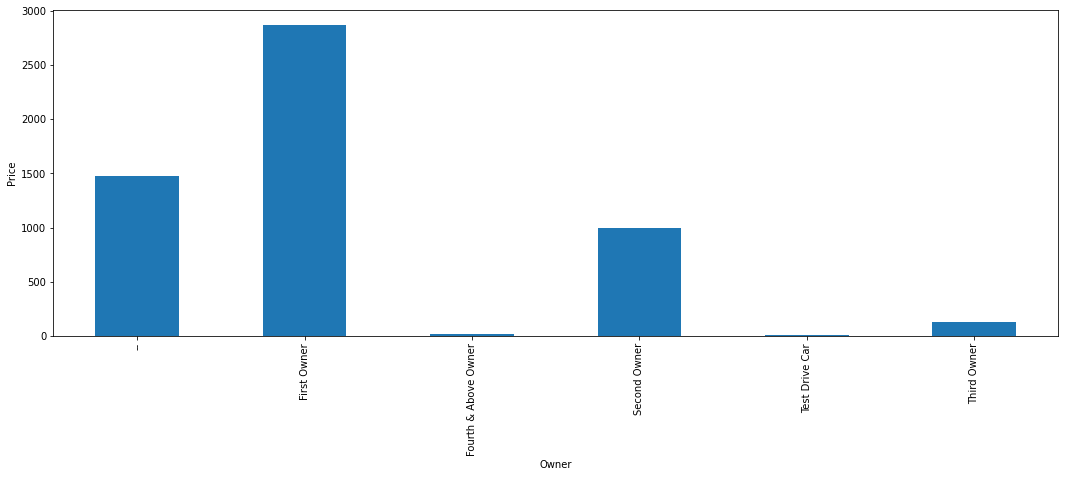

In [22]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Owner').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

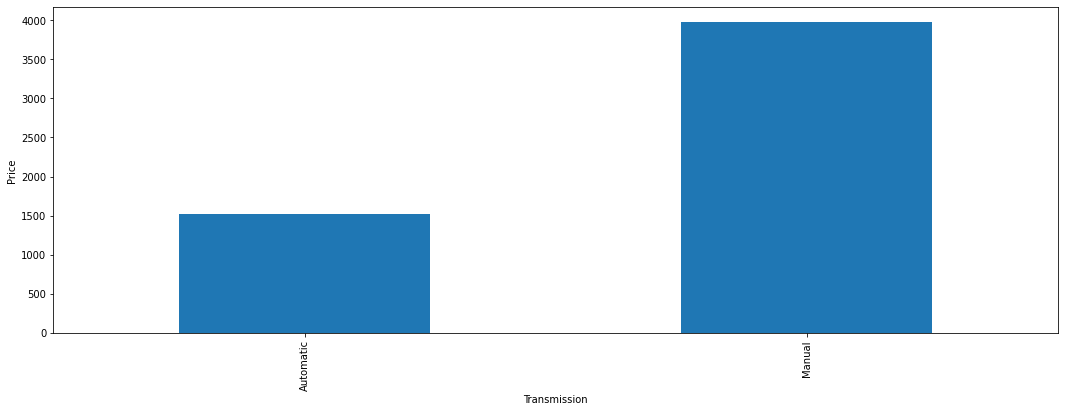

In [23]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Transmission').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

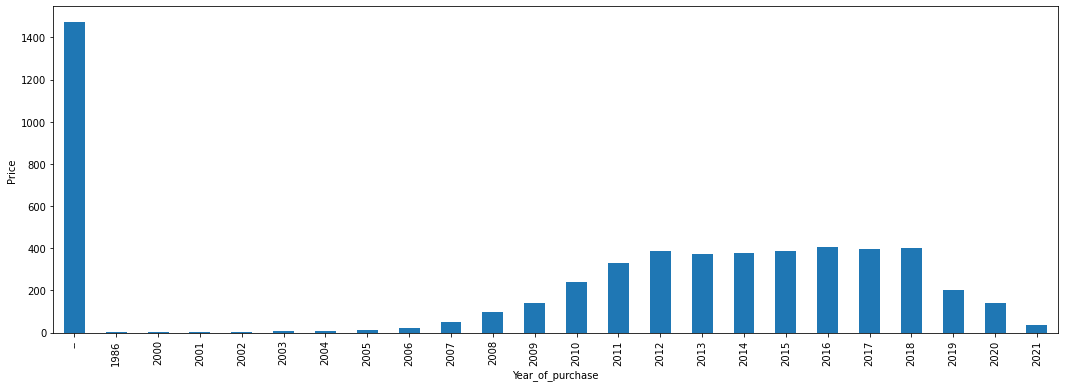

In [24]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Year_of_purchase').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

 There is 25 percent of dataset which is unknown we need to take of it in data pre-processing.

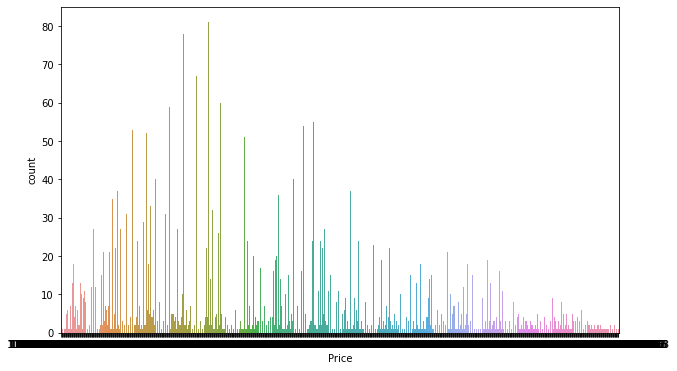

In [133]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Price', data=df)

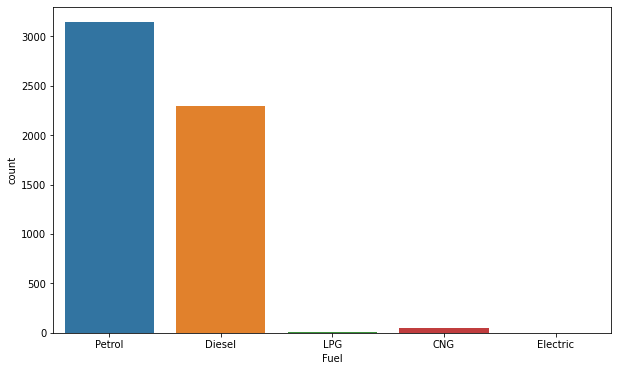

In [25]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Fuel', data=df)

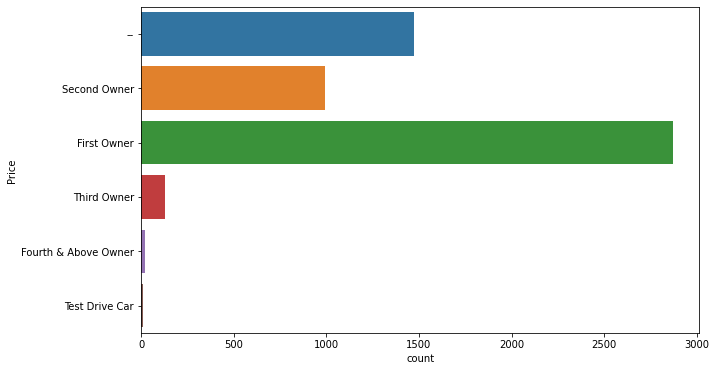

In [26]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'Owner', data=df) 
ax.set_ylabel('Price')
plt.show()

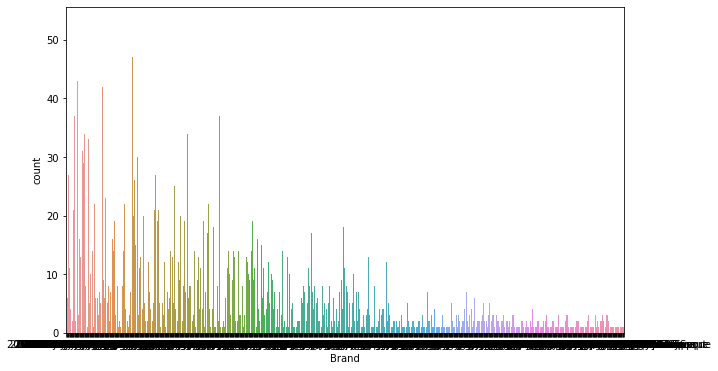

In [27]:
#fig = plt.figure(figsize=(10,6))
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Brand', data=df)
plt.show()

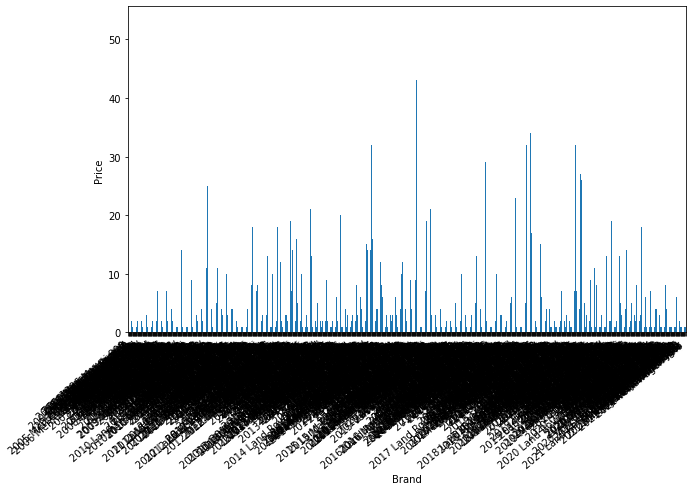

In [28]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('Brand').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [29]:
df['Owner']=df['Owner'].str.replace('--','Third Owner')
df

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,2016 Maruti Eeco,5 Seater AC BSIV,Manual,Third Owner,"45,347 kms",Petrol,--,Ahmedabad,3.5 Lakh
1,2018 Volkswagen Vento,1.5 TDI Highline,Manual,Third Owner,"97,922 kms",Diesel,--,Ahmedabad,6.99 Lakh
2,2017 Honda Amaze,S Option i-VTEC,Manual,Third Owner,"59,642 kms",Petrol,--,Ahmedabad,5.53 Lakh
3,2018 Honda City,i-VTEC V,Manual,Third Owner,"89,144 kms",Petrol,--,Ahmedabad,7.64 Lakh
4,2014 Maruti Wagon R,VXI,Manual,Third Owner,"1,31,125 kms",Petrol,--,Ahmedabad,2.94 Lakh
...,...,...,...,...,...,...,...,...,...
5488,2013 Skoda Octavia,Ambition 1.8 TSI AT,Automatic,First Owner,"50,000 kms",Petrol,2013,NaN,6.5 Lakh
5489,2015 Skoda Superb,Elegance 2.0 TDI CR AT,Automatic,Second Owner,"60,200 kms",Diesel,2015,NaN,13.5 Lakh
5490,2009 Toyota Innova,2.5 V Diesel 8-seater,Manual,First Owner,"1,74,855 kms",Diesel,2009,NaN,4.85 Lakh
5491,2011 Maruti Alto,LXi,Manual,Second Owner,"2,25,000 kms",Petrol,2011,NaN,1.5 Lakh


In [30]:
df['Year_of_purchase'] = df['Year_of_purchase'].str.replace('--','2020')
df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,2016 Maruti Eeco,5 Seater AC BSIV,Manual,Third Owner,"45,347 kms",Petrol,2020,Ahmedabad,3.5 Lakh
1,2018 Volkswagen Vento,1.5 TDI Highline,Manual,Third Owner,"97,922 kms",Diesel,2020,Ahmedabad,6.99 Lakh
2,2017 Honda Amaze,S Option i-VTEC,Manual,Third Owner,"59,642 kms",Petrol,2020,Ahmedabad,5.53 Lakh
3,2018 Honda City,i-VTEC V,Manual,Third Owner,"89,144 kms",Petrol,2020,Ahmedabad,7.64 Lakh
4,2014 Maruti Wagon R,VXI,Manual,Third Owner,"1,31,125 kms",Petrol,2020,Ahmedabad,2.94 Lakh


In [31]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "--")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                  0
Brand             0
Varient           0
Transmission      0
Owner             0
KiloMeter         0
Fuel              0
Year_of_purchase  0
Location          0
Price             0


In [32]:
from statistics import mode

In [33]:
df['Location'] = df['Location'].fillna(value = mode(df['Location']))
df.head(60)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,2016 Maruti Eeco,5 Seater AC BSIV,Manual,Third Owner,"45,347 kms",Petrol,2020,Ahmedabad,3.5 Lakh
1,2018 Volkswagen Vento,1.5 TDI Highline,Manual,Third Owner,"97,922 kms",Diesel,2020,Ahmedabad,6.99 Lakh
2,2017 Honda Amaze,S Option i-VTEC,Manual,Third Owner,"59,642 kms",Petrol,2020,Ahmedabad,5.53 Lakh
3,2018 Honda City,i-VTEC V,Manual,Third Owner,"89,144 kms",Petrol,2020,Ahmedabad,7.64 Lakh
4,2014 Maruti Wagon R,VXI,Manual,Third Owner,"1,31,125 kms",Petrol,2020,Ahmedabad,2.94 Lakh
5,2019 Maruti Swift Dzire,VXI 1.2,Manual,Third Owner,"11,935 kms",Petrol,2020,Ahmedabad,6.8 Lakh
6,2013 Toyota Innova,2.5 VX (Diesel) 8 Seater,Manual,Third Owner,"94,754 kms",Diesel,2020,Ahmedabad,6.7 Lakh
7,2016 Nissan Terrano,XL Plus 85 PS,Manual,Third Owner,"74,555 kms",Diesel,2020,Ahmedabad,4.7 Lakh
8,2020 Maruti Eeco,5 Seater AC,Manual,Third Owner,"19,627 kms",Petrol,2020,Ahmedabad,4.7 Lakh
9,2013 Maruti Wagon R,LXI BS IV,Manual,Third Owner,"85,416 kms",Petrol,2020,Ahmedabad,2.8 Lakh


In [34]:
df['KiloMeter'] = df['KiloMeter'].str.replace('kms',' ')
df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,2016 Maruti Eeco,5 Seater AC BSIV,Manual,Third Owner,"45,347",Petrol,2020,Ahmedabad,3.5 Lakh
1,2018 Volkswagen Vento,1.5 TDI Highline,Manual,Third Owner,"97,922",Diesel,2020,Ahmedabad,6.99 Lakh
2,2017 Honda Amaze,S Option i-VTEC,Manual,Third Owner,"59,642",Petrol,2020,Ahmedabad,5.53 Lakh
3,2018 Honda City,i-VTEC V,Manual,Third Owner,"89,144",Petrol,2020,Ahmedabad,7.64 Lakh
4,2014 Maruti Wagon R,VXI,Manual,Third Owner,"1,31,125",Petrol,2020,Ahmedabad,2.94 Lakh


In [35]:
df['Price'] = df['Price'].str.replace('Cr','')
df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,2016 Maruti Eeco,5 Seater AC BSIV,Manual,Third Owner,"45,347",Petrol,2020,Ahmedabad,3.5 Lakh
1,2018 Volkswagen Vento,1.5 TDI Highline,Manual,Third Owner,"97,922",Diesel,2020,Ahmedabad,6.99 Lakh
2,2017 Honda Amaze,S Option i-VTEC,Manual,Third Owner,"59,642",Petrol,2020,Ahmedabad,5.53 Lakh
3,2018 Honda City,i-VTEC V,Manual,Third Owner,"89,144",Petrol,2020,Ahmedabad,7.64 Lakh
4,2014 Maruti Wagon R,VXI,Manual,Third Owner,"1,31,125",Petrol,2020,Ahmedabad,2.94 Lakh


In [36]:
df['Brand'] = df['Brand'].str.replace('2003',' ')
df['Brand'] = df['Brand'].str.replace('2005',' ')
df['Brand'] = df['Brand'].str.replace('2011',' ')
df['Brand'] = df['Brand'].str.replace('2013',' ')
df['Brand'] = df['Brand'].str.replace('2014',' ')
df['Brand'] = df['Brand'].str.replace('2015',' ')
df['Brand'] = df['Brand'].str.replace('2016',' ')
df['Brand'] = df['Brand'].str.replace('2017',' ')
df['Brand'] = df['Brand'].str.replace('2018',' ')
df['Brand'] = df['Brand'].str.replace('2019',' ')
df['Brand'] = df['Brand'].str.replace('2020',' ')
df['Brand'] = df['Brand'].str.replace('2021',' ')

df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,Maruti Eeco,5 Seater AC BSIV,Manual,Third Owner,"45,347",Petrol,2020,Ahmedabad,3.5 Lakh
1,Volkswagen Vento,1.5 TDI Highline,Manual,Third Owner,"97,922",Diesel,2020,Ahmedabad,6.99 Lakh
2,Honda Amaze,S Option i-VTEC,Manual,Third Owner,"59,642",Petrol,2020,Ahmedabad,5.53 Lakh
3,Honda City,i-VTEC V,Manual,Third Owner,"89,144",Petrol,2020,Ahmedabad,7.64 Lakh
4,Maruti Wagon R,VXI,Manual,Third Owner,"1,31,125",Petrol,2020,Ahmedabad,2.94 Lakh


In [37]:
df['Brand'].value_counts()

  Hyundai i20               263
  Maruti Swift              191
  Maruti Wagon R            183
  Hyundai Grand i10         157
  Maruti Swift Dzire        149
                           ... 
2007 Mitsubishi Pajero        1
2012 Mahindra Bolero          1
  Porsche 911                 1
2008 Hyundai Getz             1
  Mahindra Bolero Pik-Up      1
Name: Brand, Length: 460, dtype: int64

In [38]:
df['Brand'] = df['Brand'].str.replace('2000',' ')
df['Brand'] = df['Brand'].str.replace('2010',' ')
df['Brand'] = df['Brand'].str.replace('2004',' ')
df['Brand'] = df['Brand'].str.replace('2006',' ')

df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,Maruti Eeco,5 Seater AC BSIV,Manual,Third Owner,"45,347",Petrol,2020,Ahmedabad,3.5 Lakh
1,Volkswagen Vento,1.5 TDI Highline,Manual,Third Owner,"97,922",Diesel,2020,Ahmedabad,6.99 Lakh
2,Honda Amaze,S Option i-VTEC,Manual,Third Owner,"59,642",Petrol,2020,Ahmedabad,5.53 Lakh
3,Honda City,i-VTEC V,Manual,Third Owner,"89,144",Petrol,2020,Ahmedabad,7.64 Lakh
4,Maruti Wagon R,VXI,Manual,Third Owner,"1,31,125",Petrol,2020,Ahmedabad,2.94 Lakh


In [39]:
df['Brand'] = df['Brand'].str.replace('2012',' ')

In [40]:
df['Brand'] = df['Brand'].str.replace('1986',' ')

In [41]:
df['Brand'] = df['Brand'].str.replace('2008',' ')

In [42]:
df['Brand'] = df['Brand'].str.replace('2007',' ')
df['Brand'] = df['Brand'].str.replace('2001',' ')

In [43]:
df['Brand'] = df['Brand'].str.replace('2002',' ')
df['Brand'] = df['Brand'].str.replace('2009',' ')

In [44]:
df['Brand'].value_counts()

  Hyundai i20               326
  Maruti Swift              245
  Maruti Wagon R            239
  Honda City                216
  Hyundai Grand i10         203
                           ... 
  Fiat Palio                  1
  Mini 3 DOOR                 1
  Porsche 718                 1
  Jaguar XE                   1
  Mahindra Bolero Pik-Up      1
Name: Brand, Length: 233, dtype: int64

In [45]:
df.sample(15)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
925,Maruti Wagon R,VXI AMT,Automatic,Third Owner,"45,448",Petrol,2020,Bangalore,4.35 Lakh
4440,Hyundai Xcent,1.2 CRDi S,Manual,Third Owner,"62,869",Diesel,2020,Pune,5.4 Lakh
3665,Hyundai Verna,CRDi 1.6 AT SX Option,Automatic,First Owner,"45,000",Diesel,2017,NaN,8 Lakh
2205,Maruti Ciaz,VXi,Manual,Third Owner,"38,458",Petrol,2020,NaN,6.5 Lakh
211,Toyota Innova,2.5 V Diesel 8-seater,Manual,Second Owner,"1,38,000",Diesel,2010,Ahmedabad,5.9 Lakh
1837,BMW 3 Series,320d,Automatic,First Owner,"80,000",Diesel,2011,NaN,11.5 Lakh
5322,Land Rover Range Rover Evoque,2.0 TD4 SE Dynamic,Automatic,Second Owner,"42,000",Diesel,2017,Pune,42 Lakh
2621,Maruti Celerio,VXI AT,Automatic,Third Owner,"23,327",Petrol,2020,Mumbai,4.3 Lakh
4154,Maruti Swift Dzire,VXI 1.2,Manual,First Owner,"38,118",Petrol,2018,NaN,6.81 Lakh
3407,Maruti Vitara Brezza,ZDi,Manual,First Owner,"64,420",Diesel,2018,Thane,8.95 Lakh


In [46]:
df['Owner'].value_counts()

First Owner             2870
Third Owner             1603
Second Owner             992
Fourth & Above Owner      19
Test Drive Car             9
Name: Owner, dtype: int64

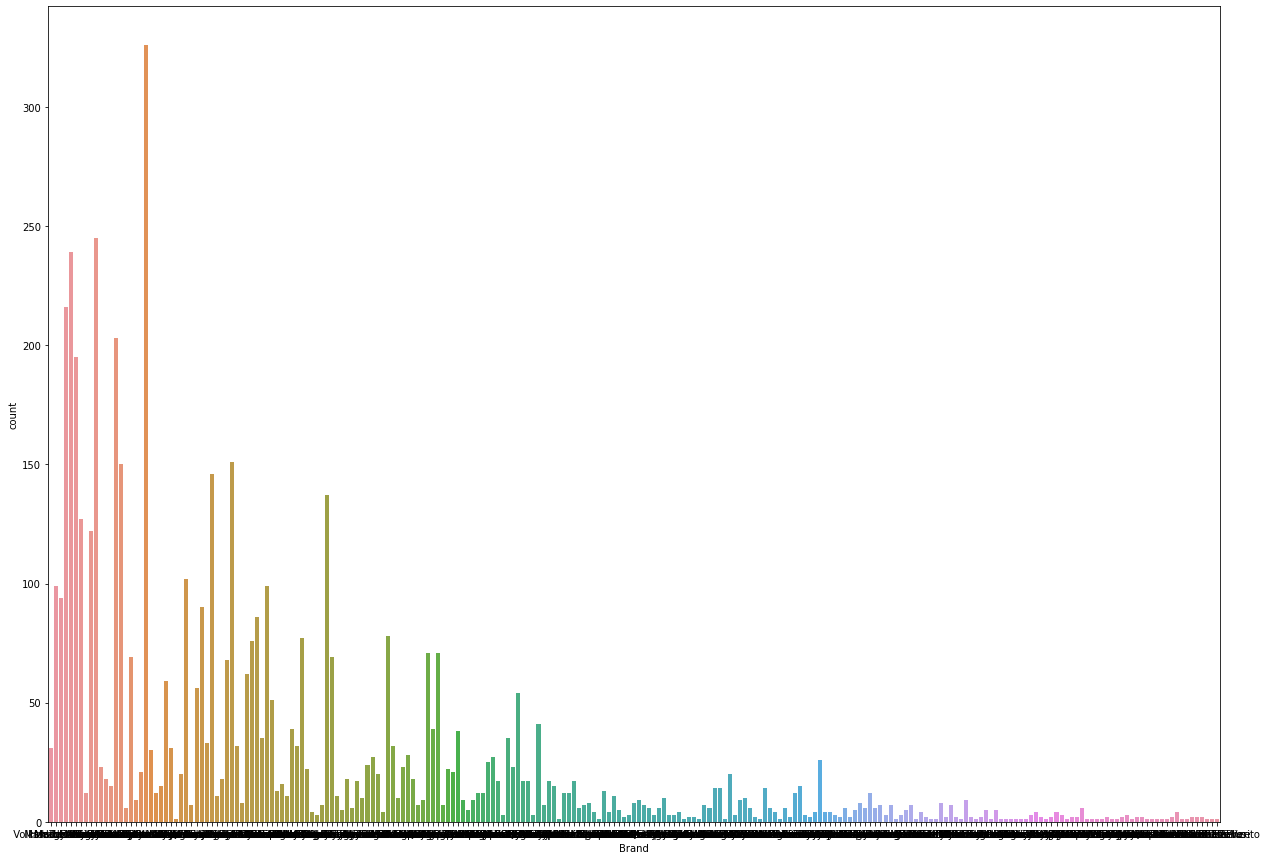

In [47]:
fig = plt.figure(figsize=(21,15))

ax = sns.countplot(x='Brand', data=df)
plt.show()

In [48]:
#ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
#'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
#for col in Owner
df['Owner'].fillna(0, inplace=True)
df['Owner'].replace({'First Owner': 1, 'Second Owner': 2,'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5 }, inplace=True)
df.sample(16)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
2267,Honda Jazz,1.2 VX i VTEC,Manual,1,"56,795",Petrol,2015,NaN,5.85 Lakh
697,Maruti Swift Dzire,VDI,Manual,3,"74,452",Diesel,2020,Bangalore,5 Lakh
2794,Honda Amaze,S,Manual,3,"27,390",Petrol,2020,Mumbai,7.03 Lakh
2805,Maruti Swift Dzire,ZXi,Manual,3,"1,13,852",Petrol,2020,Mumbai,3.98 Lakh
5215,Toyota Innova Crysta,2.4 GX MT,Manual,1,"60,000",Diesel,2019,Pune,17.25 Lakh
4104,Toyota Innova Crysta,2.4 GX MT 8S BSIV,Manual,1,"39,000",Diesel,2018,NaN,16.99 Lakh
4882,Skoda Superb,Elegance 1.8 TSI AT,Automatic,1,"55,896",Petrol,2012,Pune,5 Lakh
5021,Ford Ecosport,1.5 DV5 MT Titanium,Manual,2,"85,000",Diesel,2013,Pune,5.35 Lakh
5345,Maruti Zen,LXI,Manual,1,"80,000",Petrol,2005,Pune,1.2 Lakh
3735,Maruti Celerio,ZXI AMT,Automatic,1,"42,000",Petrol,2017,NaN,4.65 Lakh


In [49]:
df['Price'] = df['Price'].str.replace('Lakh','')
df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,Maruti Eeco,5 Seater AC BSIV,Manual,3,"45,347",Petrol,2020,Ahmedabad,3.5
1,Volkswagen Vento,1.5 TDI Highline,Manual,3,"97,922",Diesel,2020,Ahmedabad,6.99
2,Honda Amaze,S Option i-VTEC,Manual,3,"59,642",Petrol,2020,Ahmedabad,5.53
3,Honda City,i-VTEC V,Manual,3,"89,144",Petrol,2020,Ahmedabad,7.64
4,Maruti Wagon R,VXI,Manual,3,"1,31,125",Petrol,2020,Ahmedabad,2.94


In [50]:
df['Year_of_purchase'].value_counts()

2020    1613
2016     405
2018     403
2017     396
2012     387
2015     386
2014     376
2013     371
2011     330
2010     241
2019     201
2009     139
2008      98
2007      50
2021      38
2006      20
2005      14
2003       9
2004       6
2002       4
2000       3
2001       2
1986       1
Name: Year_of_purchase, dtype: int64

In [51]:
df['Year_of_purchase'].fillna(0, inplace=True)
df['Year_of_purchase'].replace({'1986': 1, '2001': 2,'2000': 3, '2002': 4, '2004': 5 ,
                     '2003': 6, '2005': 7,'2006': 8, '2021': 9, '2007': 10,
                    '2008': 11, '2009': 12,'2019': 13, '2010': 14, '2011': 15,
                    '2013': 16, '2014': 17,'2015': 18, '2012': 19, '2017': 20,
                    '2018': 21, '2016': 22,'2020': 23}, inplace=True)
df.sample(16)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
4881,Skoda Laura,Ambition 2.0 TDI CR MT,Manual,1,"85,555",Diesel,15,Pune,3.5
4403,Maruti Celerio,ZXI AT,Automatic,3,"10,437",Petrol,23,Pune,4.66
5460,Maruti Ritz,VDi,Manual,3,"1,10,000",Diesel,19,NaN,2.75
2957,Toyota Corolla Altis,1.8 G,Manual,3,"79,743",Petrol,23,Navi Mumbai,2.4
1687,Hyundai i20 Active,1.2 S,Manual,2,"26,000",Petrol,22,Bangalore,6
3619,Mercedes-Benz S-Class,S 500,Automatic,2,"44,549",Petrol,14,Mumbai,14.11
2919,Mahindra XUV300,W8 AMT Diesel BSIV,Automatic,3,"8,346",Diesel,23,Mumbai,13.81
2300,Hyundai i20,Sportz 1.2,Manual,3,"68,520",Petrol,23,Mumbai,5.79
3742,Volkswagen Polo,Diesel Comfortline 1.2L,Manual,2,"82,350",Diesel,16,NaN,3.5
4899,Maruti Ritz,VXi,Manual,3,"82,000",Petrol,12,Pune,1.95


In [52]:
df['KiloMeter'] = df['KiloMeter'].str.replace(',','')
df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,Maruti Eeco,5 Seater AC BSIV,Manual,3,45347,Petrol,23,Ahmedabad,3.5
1,Volkswagen Vento,1.5 TDI Highline,Manual,3,97922,Diesel,23,Ahmedabad,6.99
2,Honda Amaze,S Option i-VTEC,Manual,3,59642,Petrol,23,Ahmedabad,5.53
3,Honda City,i-VTEC V,Manual,3,89144,Petrol,23,Ahmedabad,7.64
4,Maruti Wagon R,VXI,Manual,3,131125,Petrol,23,Ahmedabad,2.94


In [53]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Fuel'] = le.fit_transform(df['Fuel'])
df['Varient'] = le.fit_transform(df['Varient'])
#df['Owner'] = le.fit_transform(df['Varient'])
df['Location'] = le.fit_transform(df['Location'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df.head(60)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,120,518,1,3,45347,4,23,0,3.5
1,225,220,1,3,97922,1,23,0,6.99
2,45,991,1,3,59642,4,23,0,5.53
3,49,1323,1,3,89144,4,23,0,7.64
4,132,1166,1,3,131125,4,23,0,2.94
5,129,1167,1,3,11935,4,23,0,6.8
6,212,408,1,3,94754,1,23,0,6.7
7,166,1230,1,3,74555,1,23,0,4.7
8,120,517,1,3,19627,4,23,0,4.7
9,132,877,1,3,85416,4,23,0,2.8


In [55]:
df['Location'].value_counts()

8    1345
1    1279
2    1128
5    1016
0     506
6     180
3      29
4       9
7       1
Name: Location, dtype: int64

In [56]:
df['Year_of_purchase'].unique()

array([23, 19, 21, 17, 13, 22, 20, 18, 16,  8, 12, 11, 15,  9, 14,  7,  5,
       10,  1,  4,  2,  3,  6])

In [57]:
df.nunique()

Brand                233
Varient             1353
Transmission           2
Owner                  5
KiloMeter           2487
Fuel                   5
Year_of_purchase      23
Location               9
Price                866
dtype: int64

In [58]:
df['Year_of_purchase'] = df['Year_of_purchase'].astype('int64')
df.sample(15)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
1837,9,478,0,1,80000,1,15,8,11.5
1864,128,560,0,1,24810,4,21,8,6.75
5102,87,334,0,1,1800,1,9,5,73
4725,40,945,1,1,43000,4,16,5,2.35
4305,102,1139,1,2,166000,1,15,8,4.25
4529,60,658,1,1,85000,1,17,5,4.4
2579,68,269,1,3,81108,1,23,2,3.8
2773,78,335,1,3,27881,1,23,2,12.1
5450,117,1166,1,1,60000,4,22,8,4.1
452,128,846,1,1,100821,1,17,0,3.04


In [59]:
df.dtypes

Brand                int64
Varient              int64
Transmission         int64
Owner                int64
KiloMeter           object
Fuel                 int64
Year_of_purchase     int64
Location             int64
Price               object
dtype: object

In [60]:
df['KiloMeter'] = df['KiloMeter'].astype('int')
df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,120,518,1,3,45347,4,23,0,3.5
1,225,220,1,3,97922,1,23,0,6.99
2,45,991,1,3,59642,4,23,0,5.53
3,49,1323,1,3,89144,4,23,0,7.64
4,132,1166,1,3,131125,4,23,0,2.94


In [61]:
df['Price'] = df['Price'].str.replace(',','').astype(float)
df.head(5)  

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,120,518,1,3,45347,4,23,0,3.50
1,225,220,1,3,97922,1,23,0,6.99
2,45,991,1,3,59642,4,23,0,5.53
3,49,1323,1,3,89144,4,23,0,7.64
4,132,1166,1,3,131125,4,23,0,2.94


In [135]:
df['Price'].value_counts()

2.121320    81
2.000000    78
2.236068    68
2.397916    68
2.061553    67
            ..
6.316645     1
6.312686     1
2.284732     1
5.339476     1
3.051229     1
Name: Price, Length: 845, dtype: int64

In [62]:
df.dtypes

Brand                 int64
Varient               int64
Transmission          int64
Owner                 int64
KiloMeter             int64
Fuel                  int64
Year_of_purchase      int64
Location              int64
Price               float64
dtype: object

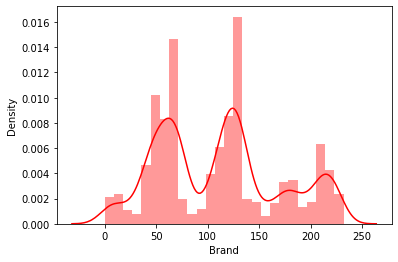

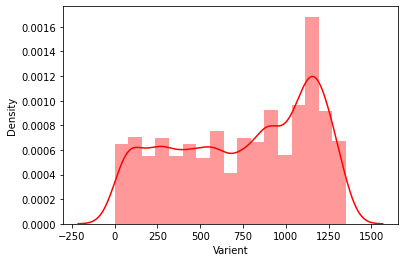

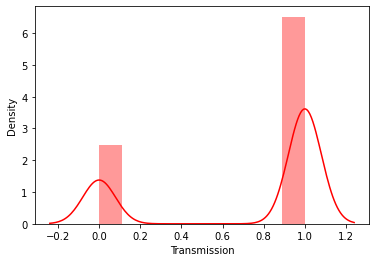

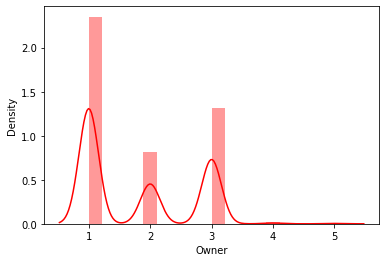

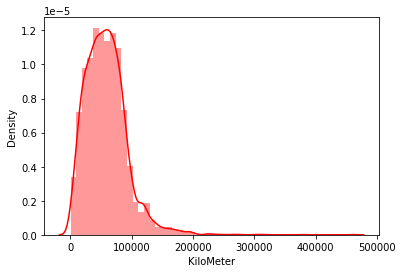

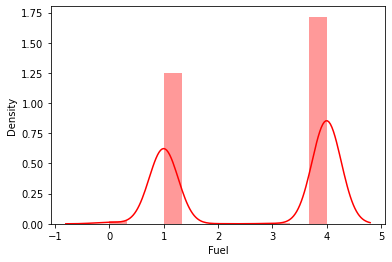

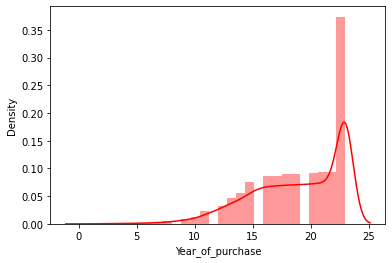

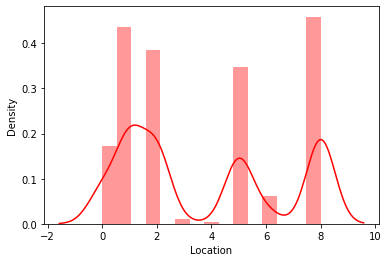

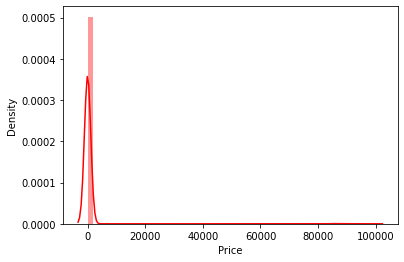

In [63]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i],color ='red')

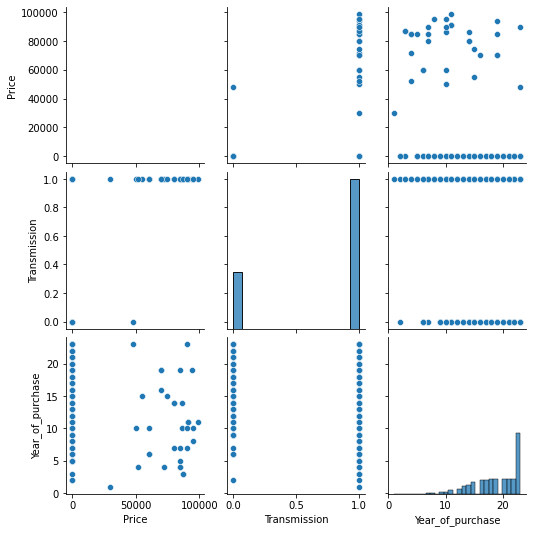

In [65]:
# Scatter plot for numerical features
num_features = ["Price", "Transmission", "Year_of_purchase"]
sns.pairplot(df[num_features], size = 2.5)
plt.show();

# Describe the dataset

In [66]:
df.describe()

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
count,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000,5493.000000
mean,110.604224,743.701438,0.724194,1.781176,58092.966685,2.711815,18.918260,3.747497,484.412199
std,59.311339,397.944539,0.446960,0.891713,33915.442313,1.494759,3.953257,2.927342,6171.600936
min,0.000000,0.000000,0.000000,1.000000,318.000000,0.000000,1.000000,0.000000,1.000000
25%,60.000000,396.000000,0.000000,1.000000,33865.000000,1.000000,16.000000,1.000000,3.650000
50%,115.000000,811.000000,1.000000,1.000000,55100.000000,4.000000,20.000000,2.000000,5.300000
75%,139.000000,1124.000000,1.000000,3.000000,76509.000000,4.000000,23.000000,6.000000,8.150000
max,232.000000,1352.000000,1.000000,5.000000,460000.000000,4.000000,23.000000,8.000000,99000.000000


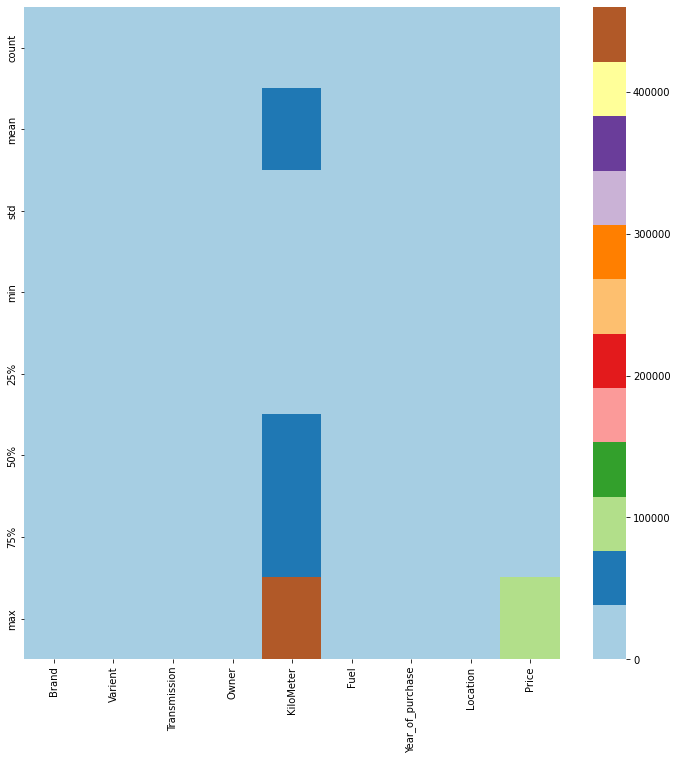

In [67]:
plt.figure(figsize= (12,12))
sns.heatmap(df.describe(),cmap = "Paired")

# Correlation

In [68]:
df.corr()

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
Brand,1.000000,-0.056362,0.068386,-0.035852,0.106632,-0.107557,-0.049301,0.031818,0.018685
Varient,-0.056362,1.000000,0.108723,0.067767,-0.047597,0.076681,0.036977,-0.019452,-0.001753
Transmission,0.068386,0.108723,1.000000,0.094788,0.126330,0.047803,-0.008639,-0.063395,0.043803
Owner,-0.035852,0.067767,0.094788,1.000000,0.022542,0.144339,0.390272,-0.185652,0.044700
KiloMeter,0.106632,-0.047597,0.126330,0.022542,1.000000,-0.364543,-0.248096,0.021170,0.049311
Fuel,-0.107557,0.076681,0.047803,0.144339,-0.364543,1.000000,0.045407,-0.057830,0.056436
Year_of_purchase,-0.049301,0.036977,-0.008639,0.390272,-0.248096,0.045407,1.000000,-0.153916,-0.160061
Location,0.031818,-0.019452,-0.063395,-0.185652,0.021170,-0.057830,-0.153916,1.000000,0.018457
Price,0.018685,-0.001753,0.043803,0.044700,0.049311,0.056436,-0.160061,0.018457,1.000000


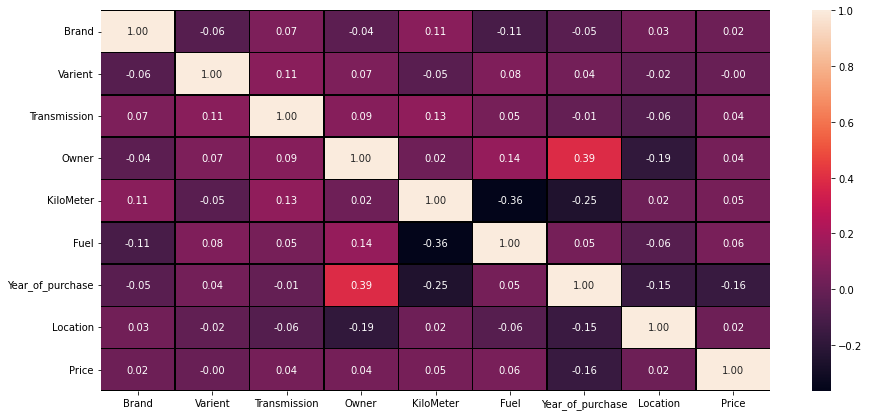

In [69]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


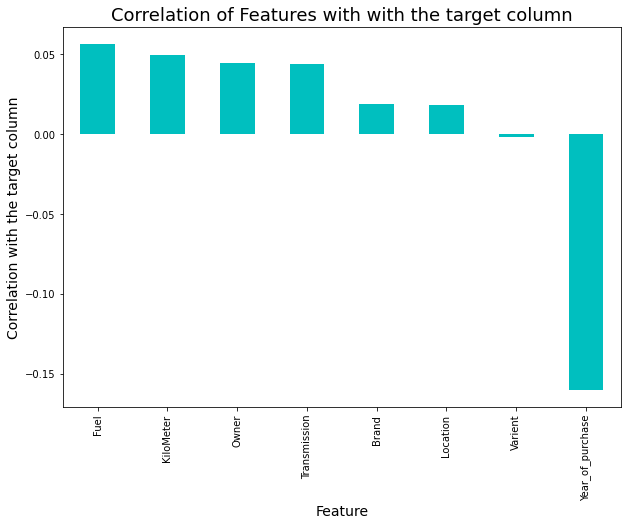

In [70]:
plt.figure(figsize=(10,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


Varient column has 0 correlation with target column and some column has same correlation hence muliticollinearity is present

In [71]:
dfy1=df.iloc[:,-1:]
dfy1

,Price
0,3.50
1,6.99
2,5.53
3,7.64
4,2.94
...,...
5488,6.50
5489,13.50
5490,4.85
5491,1.50


In [72]:
dfx1=df.copy()
dfx1.drop("Price",axis=1,inplace=True)
dfx1

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location
0,120,518,1,3,45347,4,23,0
1,225,220,1,3,97922,1,23,0
2,45,991,1,3,59642,4,23,0
3,49,1323,1,3,89144,4,23,0
4,132,1166,1,3,131125,4,23,0
...,...,...,...,...,...,...,...,...
5488,182,593,0,1,50000,4,16,8
5489,184,768,0,2,60200,1,18,8
5490,212,405,1,1,174855,1,12,8
5491,112,888,1,2,225000,4,15,8


In [73]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [75]:
calc_vif(dfx1)

,variables,VIF_Factor
0,Brand,4.258431
1,Varient,4.366486
2,Transmission,3.766660
3,Owner,6.338445
4,KiloMeter,3.862020
5,Fuel,4.367776
6,Year_of_purchase,13.533362
7,Location,2.523540


Year_of_purchase is having high vif---> 13.533362 hence we drop it

In [76]:
dfx1.drop(["Year_of_purchase"],axis=1,inplace=True)

In [77]:
calc_vif(dfx1)

,variables,VIF_Factor
0,Brand,3.878849
1,Varient,4.039326
2,Transmission,3.711929
3,Owner,4.677509
4,KiloMeter,3.787423
5,Fuel,3.981899
6,Location,2.408872


# Skewness

In [79]:
df.skew()

Brand                0.337374
Varient             -0.285219
Transmission        -1.003562
Owner                0.527235
KiloMeter            1.551664
Fuel                -0.310809
Year_of_purchase    -0.796120
Location             0.350947
Price               13.276935
dtype: float64

some outliers are present

# Now we use subplot and displot to check data are normalised or not

In [80]:
df.columns

Index(['Brand', 'Varient', 'Transmission', 'Owner', 'KiloMeter', 'Fuel',
       'Year_of_purchase', 'Location', 'Price'],
      dtype='object')

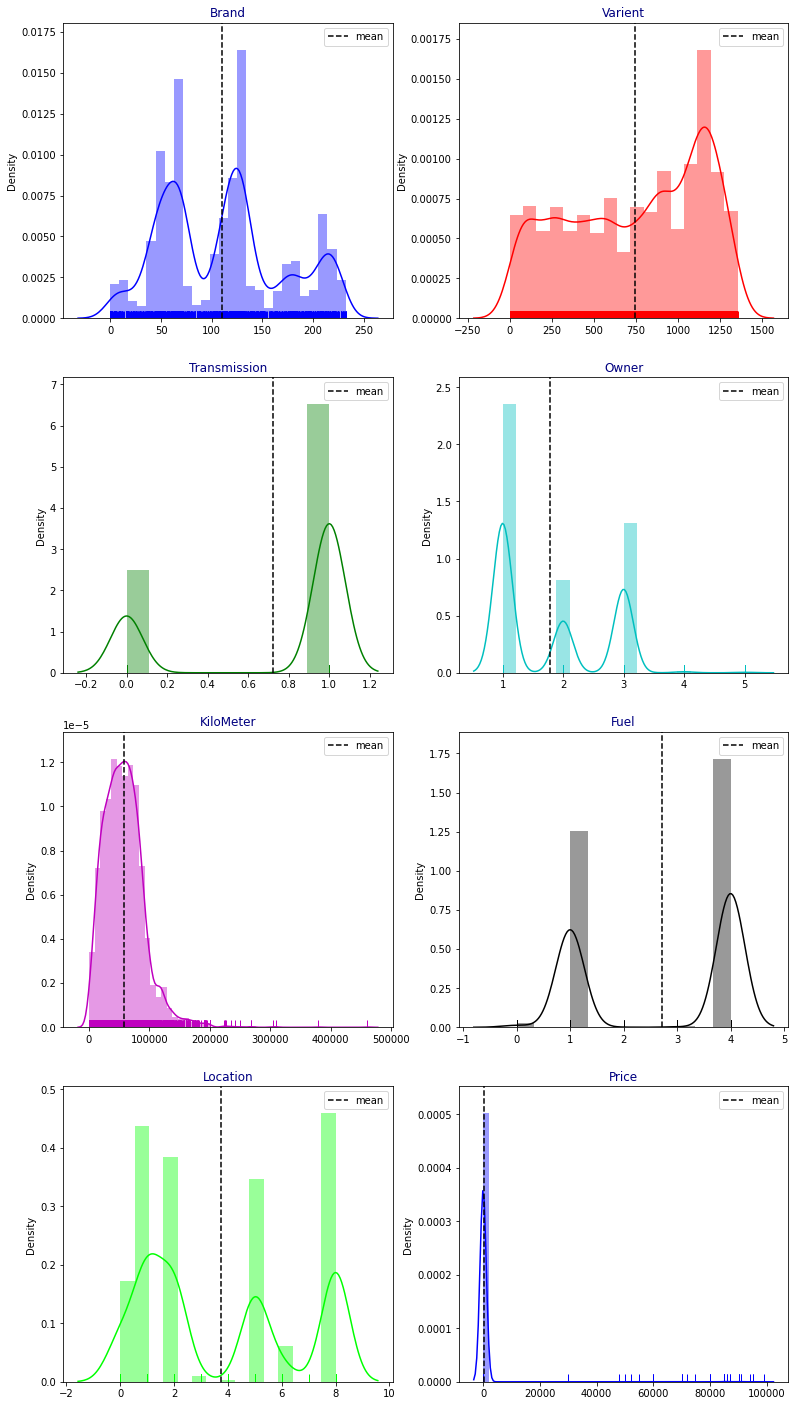

In [81]:
import itertools

cols = ['Brand', 'Varient', 'Transmission', 'Owner', 'KiloMeter', 'Fuel',
       'Location', 'Price']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

**Plotting the Outliers**

Brand                  AxesSubplot(0.125,0.816017;0.110714x0.0639831)
Varient             AxesSubplot(0.257857,0.816017;0.110714x0.0639831)
Transmission        AxesSubplot(0.390714,0.816017;0.110714x0.0639831)
Owner               AxesSubplot(0.523571,0.816017;0.110714x0.0639831)
KiloMeter           AxesSubplot(0.656429,0.816017;0.110714x0.0639831)
Fuel                AxesSubplot(0.789286,0.816017;0.110714x0.0639831)
Year_of_purchase       AxesSubplot(0.125,0.739237;0.110714x0.0639831)
Location            AxesSubplot(0.257857,0.739237;0.110714x0.0639831)
Price               AxesSubplot(0.390714,0.739237;0.110714x0.0639831)
dtype: object

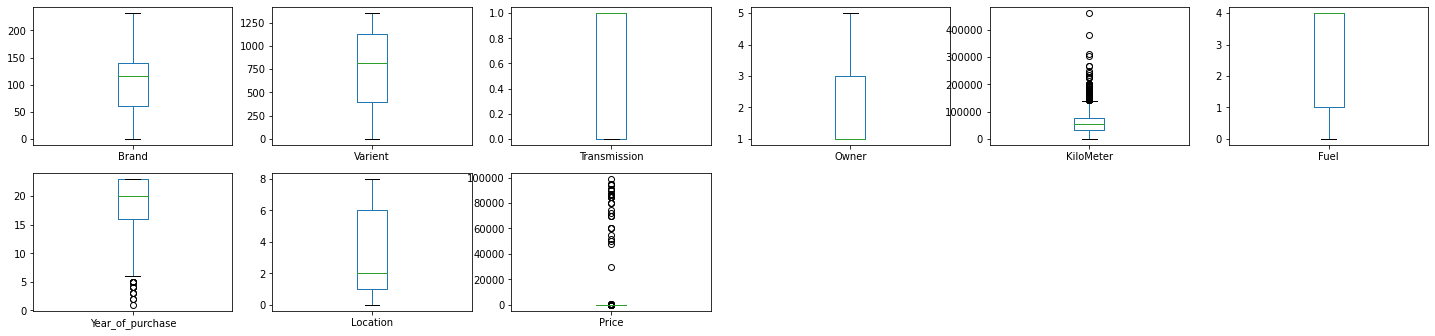

In [82]:
df.plot(kind = 'box',figsize = (25,30),layout = (10,6),sharex = False, subplots = True)

In the above plot we see KiloMeter,Year_of_purchase and Price are having outlier.

In [83]:
df['KiloMeter'] = np.sqrt(df['KiloMeter'])
df['Price'] = np.sqrt(df['Price'])
df.head(5)

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,120,518,1,3,212.948351,4,23,0,1.870829
1,225,220,1,3,312.924911,1,23,0,2.643861
2,45,991,1,3,244.217117,4,23,0,2.351595
3,49,1323,1,3,298.569925,4,23,0,2.764055
4,132,1166,1,3,362.111861,4,23,0,1.714643


In [84]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 110,  155,  324,  338,  405,  416,  436,  442,  442,  450,  474,
         474,  475, 1056, 1094, 1129, 1233, 1242, 1385, 1385, 1527, 1618,
        1622, 1632, 1797, 1797, 1888, 1992, 2004, 2037, 2039, 2056, 2059,
        2059, 2074, 2077, 2122, 2132, 2140, 2145, 3150, 3171, 3293, 3293,
        3356, 3404, 3449, 3449, 3502, 3502, 3557, 3562, 3572, 3580, 3580,
        3595, 3669, 3745, 3917, 4003, 4094, 4188, 4188, 4313, 4314, 4521,
        4535, 4550, 4592, 4675, 4677, 4694, 4727, 4811, 4822, 4822, 4867,
        4867, 4888, 5017, 5058, 5080, 5097, 5097, 5233, 5237, 5291, 5307,
        5345, 5381, 5383, 5417, 5436, 5439, 5457, 5457, 5470, 5479, 5485,
        5487, 5487, 5491]),
 array([8, 6, 4, 6, 8, 8, 8, 6, 8, 8, 4, 8, 4, 4, 6, 3, 6, 6, 6, 8, 3, 4,
        3, 4, 4, 6, 6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 8, 4, 8, 4, 4, 3, 6, 8,
        3, 4, 6, 8, 6, 8, 8, 6, 4, 6, 8, 8, 3, 4, 6, 3, 3, 6, 8, 8, 6, 8,
        4, 6, 6, 6, 8, 4, 6, 4, 6, 8, 6, 8, 8, 6, 6, 8, 6, 8, 6, 4, 8, 6,
        6,

In [85]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Brand,Varient,Transmission,Owner,KiloMeter,Fuel,Year_of_purchase,Location,Price
0,120,518,1,3,212.948351,4,23,0,1.870829
1,225,220,1,3,312.924911,1,23,0,2.643861
2,45,991,1,3,244.217117,4,23,0,2.351595
3,49,1323,1,3,298.569925,4,23,0,2.764055
4,132,1166,1,3,362.111861,4,23,0,1.714643


In [86]:
df.shape

(5493, 9)

In [87]:
df_new.shape

(5406, 9)

In [88]:
df=df_new
df.shape

(5406, 9)

**Precentage of loss in dataset**

In [89]:
percentage_loss=((5493-5431)/5493)*100
print(percentage_loss)

1.1287092663389768


Here the data loss is less than 10 percent we can go with new dataset

### **Separating the target colunmn and feature**

In [90]:
feature=df.drop("Price",axis=1)
target=df["Price"]
x=feature
y=target

In [91]:
x.shape

(5406, 8)

In [92]:
y.shape

(5406,)

In [93]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.51724138, 0.38313609, 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.96982759, 0.16272189, 1.        , ..., 0.25      , 1.        ,
        0.        ],
       [0.19396552, 0.73298817, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.79310345, 0.56804734, 0.        , ..., 0.25      , 0.66666667,
        1.        ],
       [0.9137931 , 0.29955621, 1.        , ..., 0.25      , 0.26666667,
        1.        ],
       [0.29310345, 0.21671598, 1.        , ..., 1.        , 0.66666667,
        1.        ]])

# Regressor Model Building:

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [95]:
max_scr=0
for i in range(0,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 1263  The model performs very well
At random_state:- 1263
Training r2_score is:- 44.7148999220649
Testing r2_score is:- 44.7141665333755
At random state 1855  The model performs very well
At random_state:- 1855
Training r2_score is:- 44.73099906887015
Testing r2_score is:- 44.728629963156486
At random state 1997  The model performs very well
At random_state:- 1997
Training r2_score is:- 44.736304428423445
Testing r2_score is:- 44.74267246020687


In [96]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=581,test_size=0.20)

In [97]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
print("Testing r2_score is:-", r2_score(y_test,pred_test)*100) 

Training r2_score is:- 44.88302574496652
Testing r2_score is:- 44.00455833852806


In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print("mean absolute error:",mean_absolute_error(pred_test,y_test))  # no change if we interchange pred and y_test values
print("mean squared error:",mean_squared_error(pred_test,y_test))
print("root mean squared error:",np.sqrt(mean_squared_error(pred_test,y_test)))


Error:
mean absolute error: 0.5738880851027343
mean squared error: 0.6083938990788672
root mean squared error: 0.7799960891433156


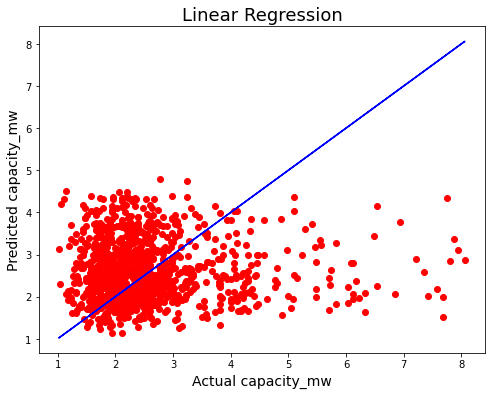

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_test, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Regularization


# 1. Lasso:

In [101]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [102]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 41.01007881960464
R2_score is :- 45.20133559139351


At cv:- 3
Cross validation score is:- 41.54126477009214
R2_score is :- 45.20133559139351


At cv:- 4
Cross validation score is:- 42.7983541986545
R2_score is :- 45.20133559139351


At cv:- 5
Cross validation score is:- 40.33292692323601
R2_score is :- 45.20133559139351


At cv:- 6
Cross validation score is:- 39.81384026044236
R2_score is :- 45.20133559139351


At cv:- 7
Cross validation score is:- 36.48186207237137
R2_score is :- 45.20133559139351


At cv:- 8
Cross validation score is:- 40.85837604296204
R2_score is :- 45.20133559139351


At cv:- 9
Cross validation score is:- 30.739564468141307
R2_score is :- 45.20133559139351




In [103]:
print("At cv:-",4)
print("Cross validation score is:-",41.167 )
print("R2_score is :-",43.264)

At cv:- 4
Cross validation score is:- 41.167
R2_score is :- 43.264


In [104]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 0.571217988541369
Mean Squared Error: 0.6410976093174809
Root Mean Square Error: 0.8006857119478784


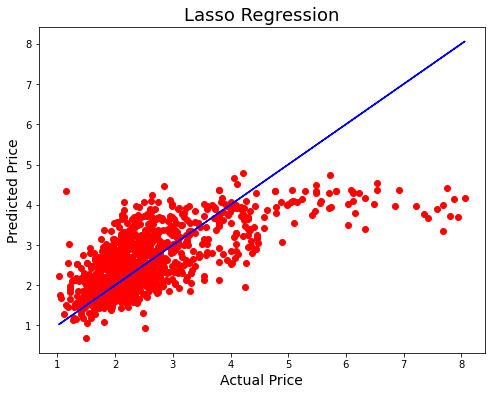

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge Regression

In [106]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [107]:
rd = Ridge(alpha=0.001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=4)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 45.19408844383788
Cross Val Score: 42.79392385952381


In [108]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 0.5712716467556088
Mean Squared Error: 0.6411823947592874
Root Mean Square Error: 0.8007386557168871


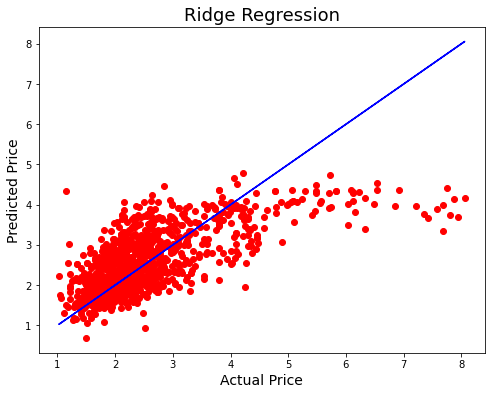

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


# Ensemble Techniques:

In [110]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'best'}


In [111]:
dt = DecisionTreeRegressor(criterion='mse', splitter='best')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=4)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 73.7555373784057
Cross Val Score: 54.24968191374331


In [112]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 0.27984544078761503
Mean Squared Error: 0.3070378160874222
Root Mean Square Error: 0.5541099314102051


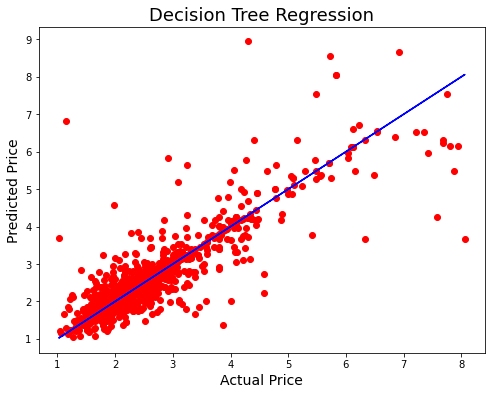

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [114]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}


In [115]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=200)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = gbr.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=4)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 82.71799688842563
Cross Val Score: 75.14290541214585


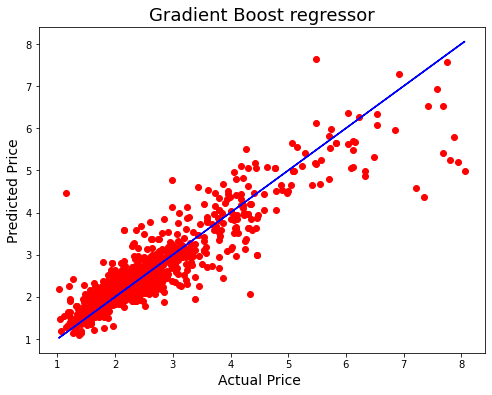

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price ',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [117]:
import xgboost
print(xgboost.__version__)

0.90


In [118]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor


In [119]:
xgb = XGBRegressor()
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train_b, y_train_b)
xgb.score(x_train_b, y_train_b)
pred_random = xgb.predict(x_test_b)

xgbs= r2_score(y_test_b,pred_random)
print('R2 Score:',xgbs*100)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbscore = cross_val_score(xgb,x,y,cv=4)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)




[11:10:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 88.85240510454851
[11:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross Val Score: 82.23591062606556


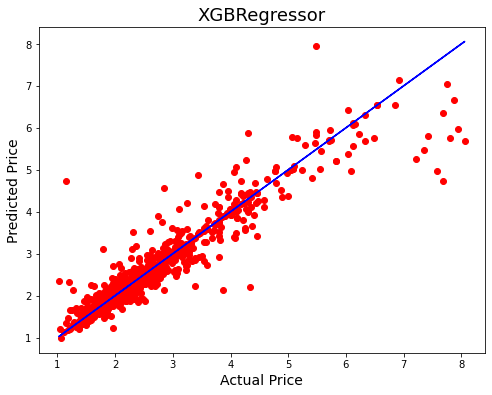

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('XGBRegressor',fontsize=18)
plt.show()

In [121]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train_b,y_train_b)
print("KNR score:",knr.score(x_train_b,y_train_b))

knr_pred=knr.predict(x_test_b)
knrs= r2_score(y_test_b,knr_pred)
print('R2 Score:',knrs*100)
knrscore = cross_val_score(knr,x,y,cv=4)
knrc= knrscore.mean() 
print('Cross Val Score:',knrc*100)


KNR score: 0.8857209128940775
R2 Score: 53.89650823287294
Cross Val Score: 46.53577935283742


In [122]:
print("Mean Squared error:",mean_squared_error(y_test_b,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test_b,knr_pred)))

Mean Squared error: 0.5393715097270003
Root Mean Squared error: 0.7344191648690823


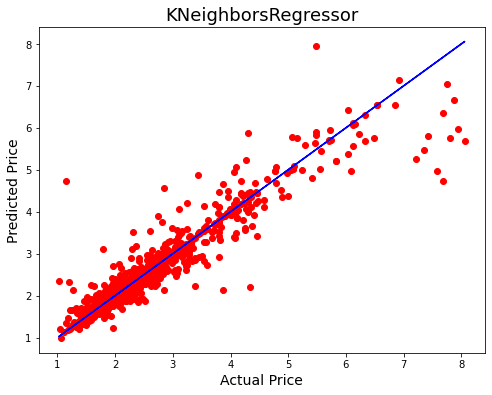

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

In [124]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_b,y_train_b)
print("SVR score:",svr.score(x_train_b,y_train_b))

svr_pred=svr.predict(x_test_b)
svrs= r2_score(y_test_b,svr_pred)
print('R2 Score:',svrs*100)
svrscore = cross_val_score(svr,x,y,cv=5)
svrc= svrscore.mean() 
print('Cross Val Score:',svrc*100)

SVR score: 0.580640410542745
R2 Score: 59.28771150880987
Cross Val Score: 50.45875322131075


In [125]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators':[50,100,200],'learning_rate':[0.1,1.0,1.5],'loss' : ['linear', 'quare', 'exponential'],'random_state':[0,1,2,3,4,5,6,7,8,9]}

#parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
abr=AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50, 'random_state': 2}


In [126]:
abr= AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50, random_state= 7)
abr.fit(x_train_b, y_train_b)
abr.score(x_train_b, y_train_b)
pred_random = abr.predict(x_test_b)

abrs= r2_score(y_test_b,pred_random)
print('R2 Score:',abrs*100)

abscore = cross_val_score(abr,x,y,cv=4)
abrc= abscore.mean() 
print('Cross Val Score:',abrc*100)

R2 Score: 52.40225971771041
Cross Val Score: 47.0821201798678


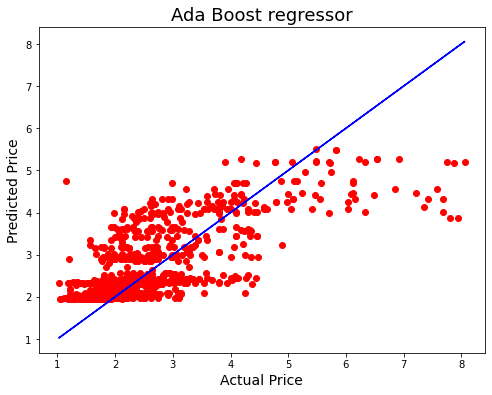

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Ada Boost regressor',fontsize=18)
plt.show()

In [128]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'kernel': 'rbf'}


In [ ]:
sv = SVR(kernel = 'rbf', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=4)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 48.063562877749156
Cross Val Score: 45.213130624307695


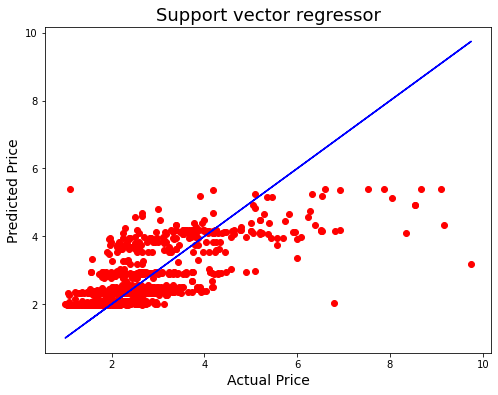

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

# The best model is XGBRegressor.
Since the difference between the percentage score of cross validation and r2_score is optimum.

R2 Score: 88.85240510454851
Cross Val Score: 82.23591062606556

# Model Saving

In [129]:
import pickle
filename = 'regressor_car_prediction.pkl'
pickle.dump(xgb,open(filename, 'wb'))

# Conclusion

In [130]:
a=np.array(y_test)
a

array([2.46981781, 2.46981781, 2.39791576, ..., 1.44913767, 2.95803989,
       1.93649167])

In [131]:
predicted=np.array(xgb.predict(x_test))
predicted

array([2.4725912, 2.4371462, 2.4257755, ..., 1.4641508, 2.9733582,
       1.9358108], dtype=float32)

In [132]:
df_used=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_used

,original,predicted
0,2.469818,2.472591
1,2.469818,2.437146
2,2.397916,2.425776
3,6.595453,6.596941
4,1.857418,1.846199
...,...,...
1077,2.439262,2.437034
1078,2.539685,2.555973
1079,1.449138,1.464151
1080,2.958040,2.973358


## From the above table the model is predicted the values with 88 percent accuracy